### 비용 함수를 최소화하는 직선을 하나 찾는 것이 과제


In [1]:
import sympy as sym

In [2]:
th = sym.Symbol('th')
th

th

### 요건을 미분을 도와주는 함수!

In [3]:
diff_th = sym.diff(38*th**2 -94*th + 62, th)
diff_th

76*th - 94

### 보스턴 주택 가격 예측

In [7]:
import pandas as pd

column_names = ['crime', 'zn', 'indus', 'chas', 'nox',
                'rm', 'age', 'dis', 'rad', 'tax',
                'ptratio', 'b', 'lstat', 'price']

boston_pd = pd.read_csv('./data/housing.csv', header=None, delimiter="\s+", names=column_names)
boston_pd.head()

,crime,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 히스토그램

In [27]:
import plotly.express as px

fig = px.histogram(boston_pd, x='price')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'price=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([24. , 21.6, 34.7, ..., 23.9, 22. , 11.9]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'price'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

### 상관계수 히트맵
- matplotlib 버전 이슈로 한 줄만 나옴

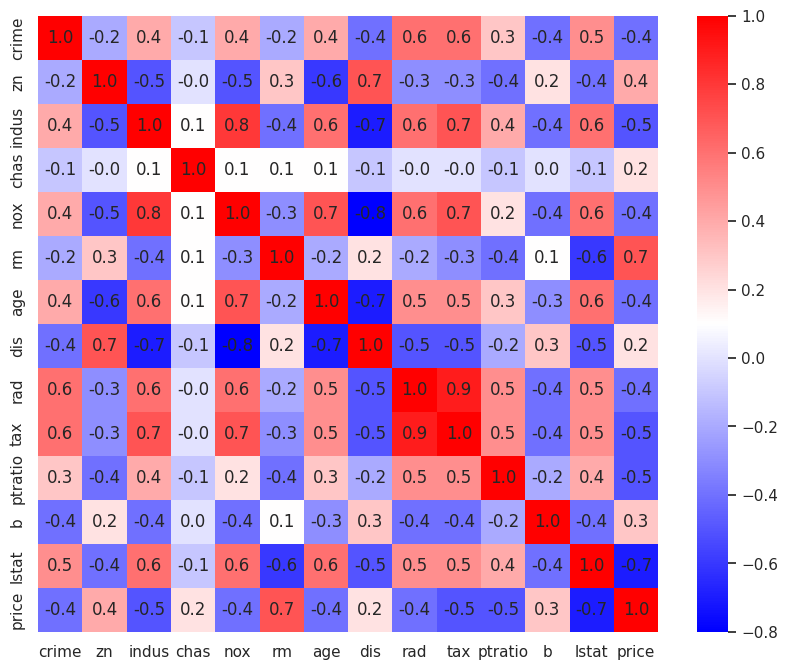

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=corr_mat, cmap='bwr', ax=ax);
for i in range(len(corr_mat.index)):
    for j in range(len(corr_mat.columns)):
        plt.text(j+0.5, i+0.5, corr_mat.iloc[i, j], verticalalignment='center', horizontalalignment='center')



### rm, lstat, price의 관계에 대해 좀 더 관찰
- 저소득층 인구가 낮을 수록 방의 갯수가 많을 수록 집 값이 높아짐
- 생각해보면 당연하다

<Axes: xlabel='lstat', ylabel='price'>

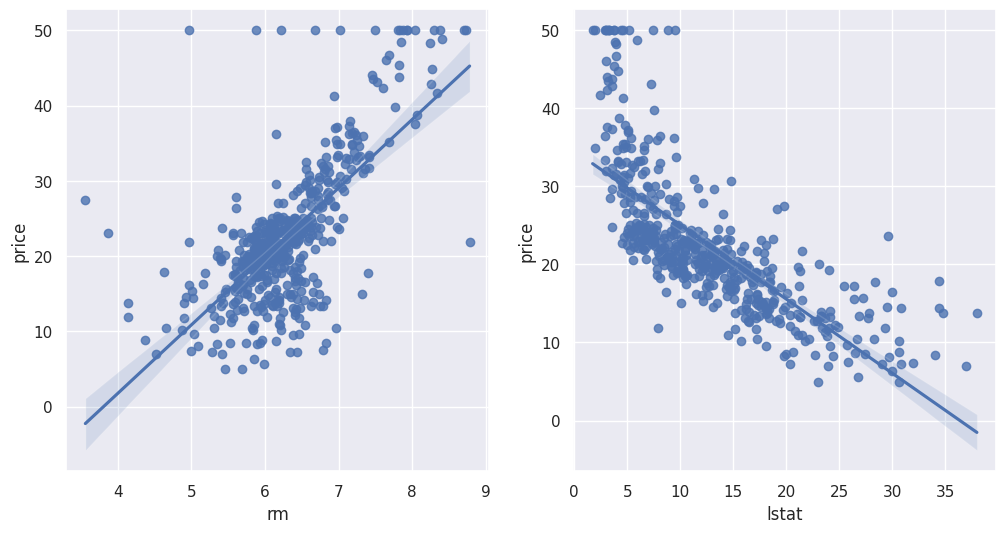

In [19]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='rm', y='price', data = boston_pd, ax=ax[0])
sns.regplot(x='lstat', y='price', data=boston_pd, ax=ax[1])

### 데이터 나누기

In [20]:
from sklearn.model_selection import train_test_split

x = boston_pd.drop('price', axis=1)
y = boston_pd['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### 모델 평가
- 평균 제곱 오차 : RMSE(Root Mean Squared Error)

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE ot train data : ', rmse_train)
print('RMSE ot test data : ', rmse_test)

RMSE ot train data :  4.642806069019823
RMSE ot test data :  4.931352584146701


### 성능 확인
- 모델 성능이 좋다면 파란색 점들이 빨간색 선 위에 있을 수록 좋은 모델임
- 집 값이 비싼 쪽에 있는 파란색 점들을 쳐내고 학습을 시킨다면 훨씬 좋은 모델을 얻을 수 있음
- 이것을 아웃레이어 제거 라고 부른다

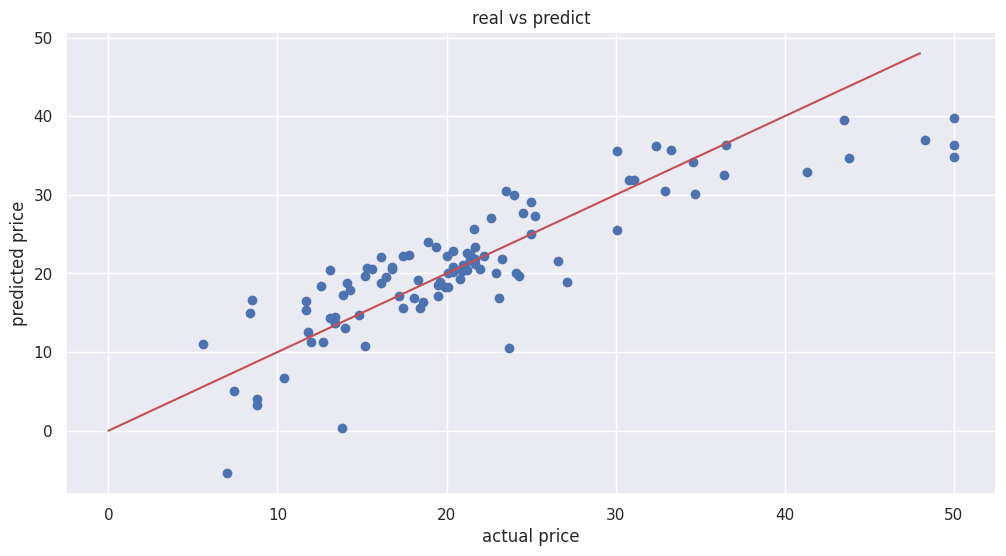

In [23]:
plt.scatter(y_test, pred_test)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('real vs predict')
plt.plot([0,48], [0,48], 'r')  ## 그냥 임의로 정한 것
plt.show();